<a href="https://colab.research.google.com/github/Priyadarshini99/Predicting-the-Popularity-of-Spotify-Songs/blob/main/Copy_of_Datamining_new1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install regressormetricgraphplot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

data =pd.read_csv("drive/My Drive/Data Mining Projects/spotify_database.csv")
data.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104,False,Adan y Eva,...,0,0,0,0,0,0,10,1,1,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104,False,Adan y Eva,...,0,0,0,0,0,1,191,0,0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104,False,Adan y Eva,...,0,0,0,0,0,0,1,1,1,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104,False,Adan y Eva,...,0,0,0,0,0,0,126,0,0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104,False,Adan y Eva,...,0,1,0,0,0,0,21,0,1,english speaking and nordic


In [ ]:
data.columns

Index(['Country', 'Uri', 'Popularity', 'Title', 'Artist', 'Album/Single',
       'Genre', 'Artist_followers', 'Explicit', 'Album',
       ...
       'Sweden', 'Switzerland', 'Taiwan', 'Turkey', 'UK', 'USA', 'Popu_max',
       'Top10_dummy', 'Top50_dummy', 'Cluster'],
      dtype='object', length=151)

In [ ]:
rows=len(data.axes[0])
columns=len(data.axes[1])
print('The number of rows:',rows)
print('The number of columns:',columns)

The number of rows: 170633
The number of columns: 151


In [ ]:
new_data = data.dropna()
new_data

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
16,Global,https://open.spotify.com/track/5xhJmd0I15jFcEd...,418.00,it wont kill ya,The Chainsmokers - Louane,album,dance pop,16931568,False,Memories...Do Not Open,...,0,0,0,0,0,0,72,0,0,global
17,USA,https://open.spotify.com/track/5xhJmd0I15jFcEd...,581.20,it wont kill ya,The Chainsmokers - Louane,album,dance pop,16931568,False,Memories...Do Not Open,...,0,0,0,0,0,1,55,0,0,english speaking and nordic
18,UK,https://open.spotify.com/track/5xhJmd0I15jFcEd...,120.80,it wont kill ya,The Chainsmokers - Louane,album,dance pop,16931568,False,Memories...Do Not Open,...,0,0,0,0,1,0,109,0,0,english speaking and nordic
19,Austria,https://open.spotify.com/track/5xhJmd0I15jFcEd...,404.00,it wont kill ya,The Chainsmokers - Louane,album,dance pop,16931568,False,Memories...Do Not Open,...,0,0,0,0,0,0,62,0,0,english speaking and nordic
20,Australia,https://open.spotify.com/track/5xhJmd0I15jFcEd...,29.60,it wont kill ya,The Chainsmokers - Louane,album,dance pop,16931568,False,Memories...Do Not Open,...,0,0,0,0,0,0,172,0,0,english speaking and nordic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170516,Taiwan,https://open.spotify.com/track/24XcdlmaW0EizWV...,102.00,thank you,Meghan Trainor - R. City,album,dance pop,9679028.0,False,Thank You (Deluxe),...,0,0,1,0,0,0,81,0,0,english speaking and nordic
170564,Taiwan,https://open.spotify.com/track/71KAUt91MxXAHR0...,631.60,somebody,Patrick Brasca,single,chinese r&b,2847.0,False,Somebody,...,0,0,1,0,0,0,78,0,0,english speaking and nordic
170577,Taiwan,https://open.spotify.com/track/5noC8HGZaLiXNdv...,1281.60,moonlight,Will Pan - Tia Ray,album,mandopop,143655.0,False,節奏先生,...,0,0,1,0,0,0,126,0,0,english speaking and nordic
170603,Taiwan,https://open.spotify.com/track/100eDEmpWV5YGVC...,6.40,audio,Sia - Diplo - Labrinth - LSD,album,australian dance,17732676.0,False,"LABRINTH, SIA & DIPLO PRESENT... LSD",...,0,0,1,0,0,0,193,0,0,english speaking and nordic


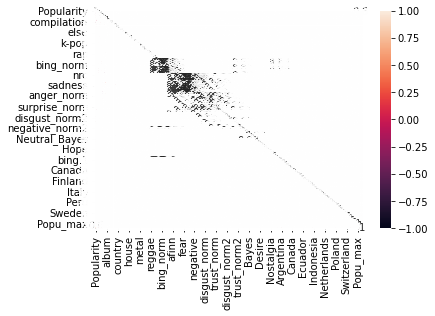

<Figure size 2000x2000 with 0 Axes>

In [ ]:
#plotting the numeric data type
import matplotlib.pyplot as plt
import seaborn as sns

matrix = new_data.corr(
    method = 'pearson',  # The method of correlation
    min_periods = 1      # Min number of observations required
)
sns.heatmap(matrix, annot=True)
from matplotlib.pyplot import figure
plt.figure(figsize=(20,20),dpi=100)
plt.show()

In [ ]:
print(new_data.columns.values)

['Country' 'Uri' 'Popularity' 'Title' 'Artist' 'Album/Single' 'Genre'
 'Artist_followers' 'Explicit' 'Album' 'Release_date' 'Track_number'
 'Tracks_in_album' 'danceability' 'energy' 'key' 'loudness' 'mode'
 'speechiness' 'acoustics' 'instrumentalness' 'liveliness' 'valence'
 'tempo' 'duration_ms' 'time_signature' 'Genre_new' 'Days_since_release'
 'Released_after_2017' 'Explicit_false' 'Explicit_true' 'album'
 'compilation' 'single' 'bolero' 'boy band' 'country' 'dance/electronic'
 'else' 'funk' 'hip hop' 'house' 'indie' 'jazz' 'k-pop' 'latin' 'metal'
 'opm' 'pop' 'r&b/soul' 'rap' 'reggae' 'reggaeton' 'rock' 'trap'
 'syuzhet_norm' 'bing_norm' 'afinn_norm' 'nrc_norm' 'syuzhet' 'bing'
 'afinn' 'nrc' 'anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness'
 'surprise' 'trust' 'negative' 'positive' 'n_words' 'anger_norm'
 'anticipation_norm' 'disgust_norm' 'fear_norm' 'joy_norm' 'sadness_norm'
 'surprise_norm' 'trust_norm' 'negative_norm' 'positive_norm'
 'anger_norm2' 'anticipation_norm2' '

In [ ]:
#filtering out numeric dataset
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = new_data.select_dtypes(include=numerics)
list1 = list(newdf.columns)



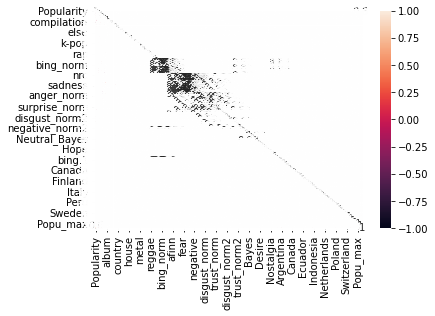

<Figure size 20000x20000 with 0 Axes>

In [ ]:
#plotting the numeric data type
import matplotlib.pyplot as plt
import seaborn as sns

matrix = newdf.corr(
    method = 'pearson',  # The method of correlation
    min_periods = 1      # Min number of observations required
)
sns.heatmap(matrix, annot=True)
from matplotlib.pyplot import figure
plt.figure(figsize=(200,200),dpi=100)
plt.show()

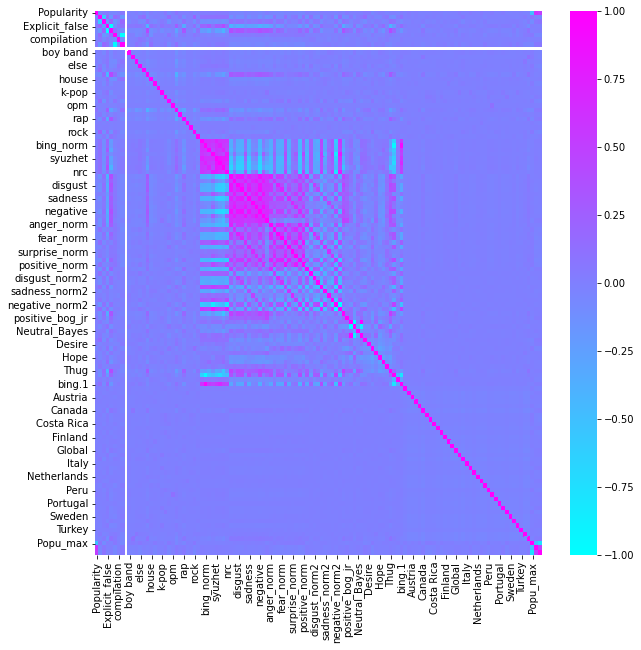

In [ ]:
import numpy as np # Data manipulation  
import matplotlib.pyplot as plt 
import seaborn
corr= new_data.corr() 
# c = pd.DataFrame(newdf.corr().abs().unstack())
# c.reset_index(inplace=True)
# corr.columns=['level_0','level_1','values']
# pop_corr = corr[corr.level_0=='Popularity']
c= newdf.corr().abs().unstack()
so = c.sort_values(ascending=True)
plt.figure(figsize=(10,10)) 
seaborn.heatmap(corr, cmap='cool') 
plt.show()

In [ ]:
df2 = pd.DataFrame(new_data, columns = [ 'Argentina','Australia','Austria','Belgium','Brazil','Canada','Chile','Colombia','Costa Rica','Denmark','Ecuador','Finland',
 'France','Germany','Global','Indonesia','Ireland','Italy','Malaysia','Mexico','Netherlands','New Zealand','Norway','Peru','Philippines','Poland','Portugal',
 'Singapore','Spain','Sweden','Switzerland','Taiwan','Turkey','UK','USA']) #this is taking the raw data 

def flag_df2(df):
  if (df['Argentina'])== 1:
    return 'Argentina'
  elif (df['Australia'])==1:
    return 'Australia'
  elif (df['Austria'])==1:
    return 'Austria'
  elif (df['Belgium'])==1:
    return 'Belgium'
  elif (df['Brazil'])==1:
    return 'Brazil'  
  elif (df['Canada'])==1:
    return 'Canada'
  elif (df['Chile'])==1:
    return 'Chile'
  elif (df['Colombia'])==1:
    return 'Colombia'
  elif (df['Costa Rica'])==1:
    return 'Costa Rica'
  elif (df['Denmark'])==1:
    return 'Denmark'
  elif (df['Ecuador'])==1:
    return 'Ecuador'
  elif (df['Finland'])==1:
    return 'Finland'
  elif (df['France'])==1:
    return 'France'
  elif (df['Germany'])==1:
    return 'Germany'
  elif (df['Global'])==1:
    return 'Global'
  elif (df['Indonesia'])==1:
    return 'Indonesia'
  elif (df['Ireland'])==1:
    return 'Ireland'
  elif (df['Italy'])==1:
    return 'Italy'
  elif (df['Malaysia'])==1:
    return 'Italy'
  elif (df['Mexico'])==1:
    return 'Italy'
  elif (df['Netherlands'])==1:
    return 'Italy'
  elif (df['New Zealand'])==1:
    return 'New Zealand'
  elif (df['Peru'])==1:
    return 'Peru'
  elif (df['Philippines'])==1:
    return 'Philippines'
  elif (df['Portugal'])==1:
    return 'Portugal'
  elif (df['Singapore'])==1:
    return 'Singapore'
  elif (df['Spain'])==1:
    return 'Spain'
  elif (df['Sweden'])==1:
    return 'Sweden'
  elif (df['Switzerland'])==1:
    return 'Switzerland'
  elif (df['Taiwan'])==1:
    return 'Taiwan'
  elif (df['Turkey'])==1:
    return 'Turkey'
  elif (df['UK'])==1:
    return 'UK'
  elif (df['USA'])==1:
    return 'USA'
  else:
    return 'Nan'
df2['Country_column'] = df2.apply(flag_df2, axis = 1)
   
  
  
  
  
 

    

In [ ]:
new_data["Countries"]=df2["Country_column"]

<ipython-input-68-609b41477a6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Countries"]=df2["Country_column"]


In [ ]:
extracted =df2["Country_column"]


In [ ]:
df3 = pd.DataFrame(new_data, columns = ['bolero','boy band','country','dance/electronic', 'else','funk','hip hop','house','indie','jazz','k-pop', 'latin','metal','opm',
                                        'pop','r&b/soul','rap','reggae','reggaeton','rock','trap', ]) #this is taking the raw data 

def flag_df3(df):
  if (df['bolero'])== 1:
    return 'bolero'
  elif (df['boy band'])==1:
    return 'boy band'
  elif (df['country'])==1:
    return 'country'
  elif (df['dance/electronic'])==1:
    return 'dance/electronic'  
  elif (df['else'])==1:
     return 'else'
  elif (df['funk'])==1:
     return 'funk'
  elif (df['hip hop'])==1:
    return 'hip hop'
  elif (df['house'])==1:
    return 'house'
  elif (df['indie'])==1:
    return 'indie'
  elif (df['jazz'])==1:
    return 'jazz'
  elif (df['k-pop'])==1:
    return 'k-pop'
  elif (df['latin'])==1:
    return 'latin'
  elif (df['metal'])==1:
    return 'metal'
  elif (df['opm'])==1:
    return 'opm'
  elif (df['pop'])==1:
    return 'pop'
  elif (df['r&b/soul'])==1:
    return 'r&b/soul'
  elif (df['rap'])==1:
    return 'rap'
  elif (df['reggae'])==1:
    return 'reggae'
  elif (df['reggaeton'])==1:
    return 'reggaeton'
  elif (df['rock'])==1:
    return 'rock'
  elif (df['trap'])==1:
    return 'trap'
  else:
    return 'Nan'

df3['Song_Vibe'] = df3.apply(flag_df3, axis = 1)


In [ ]:
new_data["Song_Type"]=df3["Song_Vibe"]

<ipython-input-71-8361f38a4839>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Song_Type"]=df3["Song_Vibe"]


In [ ]:
df4 = pd.DataFrame(new_data, columns = [ 'Celebrate', 'Desire','Explore','Fun','Hope','Love','Nostalgia','Thug',]) #this is taking the raw data 
def flag_df4(df):
   if (df['Celebrate'])== 1:
     return 'Celebrate'
   elif (df['Desire'])==1:
    return 'Desire'
   elif (df['Explore'])==1:
    return 'Explore'
   elif (df['Fun'])==1:
    return 'Fun'
   elif (df['Hope'])==1:
    return 'Hope'
   elif (df['Love'])==1:
     return 'Love'
   elif (df['Nostalgia'])==1:
     return 'Nostalgia'
   elif (df['Thug'])==1:
     return 'Thug'
   else:
    return 'Nan'
df4['Song_m']=df4.apply(flag_df4, axis = 1)

In [ ]:
new_data["Song_Purpose"]=df4["Song_m"]

<ipython-input-73-8449d0492b23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Song_Purpose"]=df4["Song_m"]


In [ ]:
df5 = pd.DataFrame(new_data, columns = [ 'album','compilation','single']) #this is taking the raw data 
def flag_df5(df):
   if (df['album'])== 1:
     return 'album'
   elif (df['compilation'])==1:
    return 'compilation'
   elif (df['single'])==1:
    return 'single'
   else:
    return 'Nan'
df5['song_com']=df5.apply(flag_df5, axis = 1)

In [ ]:
new_data["Song_composers"]=df5["song_com"]

<ipython-input-75-4527ae35a384>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Song_composers"]=df5["song_com"]


In [ ]:
cleansed_data=new_data.drop(['bolero','boy band','country','dance/electronic','else','funk','hip hop','house','indie','jazz','k-pop','latin','metal','opm','pop', 'r&b/soul',
 'rap','reggae','reggaeton','rock','trap','Argentina','Australia','Austria','Belgium','Brazil','Canada','Chile','Colombia','Costa Rica','Denmark','Ecuador',
 'Finland','France','Germany', 'Global', 'Indonesia','Ireland','Italy','Malaysia','Mexico','Netherlands','New Zealand', 'Norway','Peru','Philippines','Poland',
 'Portugal','Singapore','Spain','Sweden','Switzerland','Taiwan', 'Turkey','UK','USA','Celebrate', 'Desire','Explore','Fun','Hope','Love','Nostalgia','Thug','syuzhet',
'bing','afinn','nrc','anger','anticipation', 'disgust','fear','joy','sadness', 'surprise','trust','negative','positive','anger_norm','anticipation_norm','disgust_norm',
 'fear_norm','joy_norm','sadness_norm','surprise_norm','trust_norm','negative_norm','positive_norm','Top10_dummy','Top50_dummy','Uri','anticipation','album',
 'single','LDA_Topic','n_words','Explicit_false','Explicit_true','Genre','Country','Album/Single','Genre_new'],axis=1)

In [ ]:
cleansed_data.columns

Index(['Popularity', 'Title', 'Artist', 'Artist_followers', 'Explicit',
       'Album', 'Release_date', 'Track_number', 'Tracks_in_album',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acoustics', 'instrumentalness', 'liveliness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'Days_since_release',
       'Released_after_2017', 'compilation', 'syuzhet_norm', 'bing_norm',
       'afinn_norm', 'nrc_norm', 'anger_norm2', 'anticipation_norm2',
       'disgust_norm2', 'fear_norm2', 'joy_norm2', 'sadness_norm2',
       'surprise_norm2', 'trust_norm2', 'negative_norm2', 'positive_norm2',
       'negative_bog_jr', 'positive_bog_jr', 'Bayes', 'Negative_Bayes',
       'Neutral_Bayes', 'Positive_Bayes', 'bing_norm_negative',
       'bing_norm_neutral', 'bing.1', 'Popu_max', 'Cluster', 'Countries',
       'Song_Type', 'Song_Purpose', 'Song_composers'],
      dtype='object')

In [ ]:
cleansed_data

,Popularity,Title,Artist,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,...,Positive_Bayes,bing_norm_negative,bing_norm_neutral,bing.1,Popu_max,Cluster,Countries,Song_Type,Song_Purpose,Song_composers
16,418.00,it wont kill ya,The Chainsmokers - Louane,16931568,False,Memories...Do Not Open,4/7/17,7,12,0.572,...,0.0,1,0,0,72,global,Global,pop,Desire,album
17,581.20,it wont kill ya,The Chainsmokers - Louane,16931568,False,Memories...Do Not Open,4/7/17,7,12,0.572,...,0.0,1,0,0,55,english speaking and nordic,USA,pop,Desire,album
18,120.80,it wont kill ya,The Chainsmokers - Louane,16931568,False,Memories...Do Not Open,4/7/17,7,12,0.572,...,0.0,1,0,0,109,english speaking and nordic,UK,pop,Desire,album
19,404.00,it wont kill ya,The Chainsmokers - Louane,16931568,False,Memories...Do Not Open,4/7/17,7,12,0.572,...,0.0,1,0,0,62,english speaking and nordic,Austria,pop,Desire,album
20,29.60,it wont kill ya,The Chainsmokers - Louane,16931568,False,Memories...Do Not Open,4/7/17,7,12,0.572,...,0.0,1,0,0,172,english speaking and nordic,Australia,pop,Desire,album
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170516,102.00,thank you,Meghan Trainor - R. City,9679028.0,False,Thank You (Deluxe),5/13/16,15,15,0.718,...,1.0,1,0,0,81,english speaking and nordic,Taiwan,pop,Love,album
170564,631.60,somebody,Patrick Brasca,2847.0,False,Somebody,10/8/20,1,1,0.761,...,0.0,0,0,1,78,english speaking and nordic,Taiwan,r&b/soul,Hope,single
170577,1281.60,moonlight,Will Pan - Tia Ray,143655.0,False,節奏先生,9/10/20,11,14,0.674,...,0.0,0,1,0,126,english speaking and nordic,Taiwan,pop,Thug,album
170603,6.40,audio,Sia - Diplo - Labrinth - LSD,17732676.0,False,"LABRINTH, SIA & DIPLO PRESENT... LSD",4/12/19,4,10,0.568,...,1.0,1,0,0,193,english speaking and nordic,Taiwan,dance/electronic,Explore,album


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

new_cleanseddf = cleansed_data.select_dtypes(include=numerics)

list_cleansed = list(new_cleanseddf.columns)
len(list_cleansed)

28

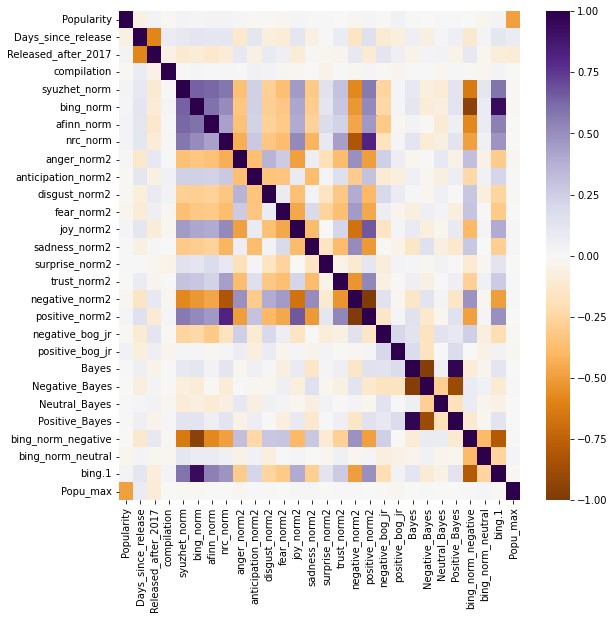

In [ ]:
import numpy as np # Data manipulation  
import matplotlib.pyplot as plt 
import seaborn
corr= cleansed_data.corr() 
# c = pd.DataFrame(newdf.corr().abs().unstack())
# c.reset_index(inplace=True)
# corr.columns=['level_0','level_1','values']
# pop_corr = corr[corr.level_0=='Popularity']
c= newdf.corr().abs().unstack()
so = c.sort_values(ascending=True)
plt.figure(figsize=(9,9)) 
seaborn.heatmap(corr, cmap='PuOr') 
plt.show()

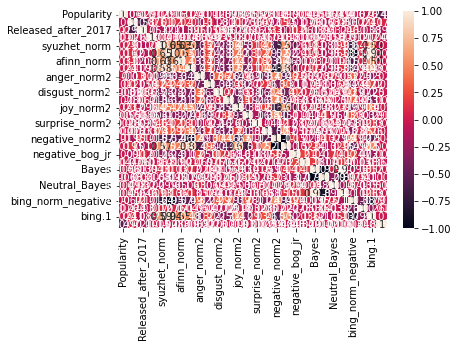

<Figure size 18000x18000 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

matrix_2=new_cleanseddf .corr(
    method = 'pearson',  # The method of correlation
    min_periods = 1      # Min number of observations required
)

sns.heatmap(matrix_2, annot=True)
from matplotlib.pyplot import figure

plt.figure(figsize=(250,250))
plt.show()

In [ ]:
cleansed_data.dtypes

Popularity             float64
Title                   object
Artist                  object
Artist_followers        object
Explicit                object
Album                   object
Release_date            object
Track_number            object
Tracks_in_album         object
danceability            object
energy                  object
key                     object
loudness                object
mode                    object
speechiness             object
acoustics               object
instrumentalness        object
liveliness              object
valence                 object
tempo                   object
duration_ms             object
time_signature          object
Days_since_release     float64
Released_after_2017    float64
compilation              int64
syuzhet_norm           float64
bing_norm              float64
afinn_norm             float64
nrc_norm               float64
anger_norm2            float64
anticipation_norm2     float64
disgust_norm2          float64
fear_nor

In [ ]:
# import numpy as np # Data manipulation  
# import matplotlib.pyplot as plt 
# import seaborn
# corr_new= new_cleanseddf.corr() 

# c_clean= new_cleanseddf.corr().abs().unstack()
# so = c_clean.sort_values(ascending=True)
# plt.figure(figsize=(5,5)) 
# seaborn.heatmap(corr_new, cmap='RdYlGn_r') 
# plt.show()

In [ ]:
#EXISTING DATATYPE FOR DATASET


# converting the string data type to numeric data type
# df['DataFrame Column'] = pd.to_numeric(df['DataFrame Column'],errors='coerce')
# df['DataFrame Column'] = df['DataFrame Column'].astype(float)

cleansed_data['Artist_followers']=cleansed_data['Artist_followers'].astype(int)
cleansed_data['danceability']=cleansed_data['danceability'].astype(float)
cleansed_data['energy']=cleansed_data['energy'].astype(float)
cleansed_data['loudness']=cleansed_data['loudness'].astype(float)
cleansed_data['speechiness']=cleansed_data['speechiness'].astype(float)
cleansed_data['acoustics']=cleansed_data['acoustics'].astype(float)
cleansed_data['instrumentalness']=cleansed_data['instrumentalness'].astype(float)
cleansed_data['valence']=cleansed_data['valence'].astype(float)
cleansed_data['liveliness']=cleansed_data['liveliness'].astype(float)
cleansed_data['tempo']=cleansed_data['tempo'].astype(float)
cleansed_data['Track_number']=cleansed_data['Track_number'].astype(int)
cleansed_data['Tracks_in_album']=cleansed_data['Tracks_in_album'].astype(int)
cleansed_data['key']=cleansed_data['key'].astype(int)
cleansed_data['mode']=cleansed_data['mode'].astype(int)
cleansed_data['duration_ms']=cleansed_data['duration_ms'].astype(int)
cleansed_data['time_signature']=cleansed_data['time_signature'].astype(int)
cleansed_data['Explicit']=cleansed_data['Explicit'].astype(bool)

# converting data type of monthdateyear format from string to date
# cleansed_data['Release_date'] = cleansed_data.to_datetime(cleansed_data['Release_date'], format='%m%d%Y')

In [ ]:
cleansed_data.dtypes



Popularity             float64
Title                   object
Artist                  object
Artist_followers         int64
Explicit                  bool
Album                   object
Release_date            object
Track_number             int64
Tracks_in_album          int64
danceability           float64
energy                 float64
key                      int64
loudness               float64
mode                     int64
speechiness            float64
acoustics              float64
instrumentalness       float64
liveliness             float64
valence                float64
tempo                  float64
duration_ms              int64
time_signature           int64
Days_since_release     float64
Released_after_2017    float64
compilation              int64
syuzhet_norm           float64
bing_norm              float64
afinn_norm             float64
nrc_norm               float64
anger_norm2            float64
anticipation_norm2     float64
disgust_norm2          float64
fear_nor

In [ ]:
new_df=cleansed_data

In [ ]:
new_df.dtypes

Popularity             float64
Title                   object
Artist                  object
Artist_followers         int64
Explicit                  bool
Album                   object
Release_date            object
Track_number             int64
Tracks_in_album          int64
danceability           float64
energy                 float64
key                      int64
loudness               float64
mode                     int64
speechiness            float64
acoustics              float64
instrumentalness       float64
liveliness             float64
valence                float64
tempo                  float64
duration_ms              int64
time_signature           int64
Days_since_release     float64
Released_after_2017    float64
compilation              int64
syuzhet_norm           float64
bing_norm              float64
afinn_norm             float64
nrc_norm               float64
anger_norm2            float64
anticipation_norm2     float64
disgust_norm2          float64
fear_nor

In [ ]:
# new_df=cleansed_data.drop(['positive_bog_jr','negative_bog_jr','Days_since_release','Positive_Bayes', 'Neutral_Bayes','Negative_Bayes','Bayes','Cluster','bing_norm_neutral','bing_norm_negative','Tracks_in_album','Countries','Popu_max','Artist_followers','Album/Single','Released_after_2017',
#                      'anger_norm2', 'anticipation_norm2', 'disgust_norm2', 'fear_norm2', 'joy_norm2','sadness_norm2', 'surprise_norm2', 'trust_norm2', 'negative_norm2','positive_norm2','Genre_new','syuzhet_norm','nrc_norm','bing_norm','afinn_norm','bing.1'],axis=1)

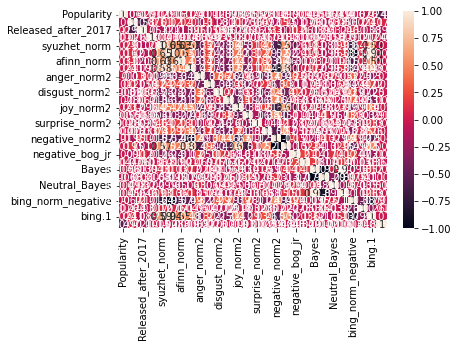

<Figure size 18000x18000 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

matrix_2=new_cleanseddf .corr(
    method = 'pearson',  # The method of correlation
    min_periods = 1     # Min number of observations required
)

sns.heatmap(matrix_2, annot=True)
from matplotlib.pyplot import figure

plt.figure(figsize=(250,250))
plt.show()

In [ ]:

# new_df['Country']=new_df['Country'].astype(object)

# new_df['Title']=new_df['Title'].astype(object)

# new_df['Artist']=new_df['Artist'].astype(object)
# new_df['Popularity']=new_df['Popularity'].astype(float)
# new_df['energy']=new_df['energy'].astype(float)
# new_df['loudness']=new_df['loudness'].astype(float)
# new_df['speechiness']=new_df['speechiness'].astype(float)
# new_df['acoustics']=new_df['acoustics'].astype(float)
# new_df['instrumentalness']=new_df['instrumentalness'].astype(float)
# new_df['valence']=new_df['valence'].astype(float)
# new_df['liveliness']=new_df['liveliness'].astype(float)
# new_df['tempo']=new_df['tempo'].astype(float)
# new_df['key']=new_df['key'].astype(int)
# new_df['Track_number']=new_df['Track_number'].astype(int)
# new_df['mode']=new_df['mode'].astype(int)
# new_df['duration_ms']=new_df['duration_ms'].astype(int)
# new_df['Explicit']=new_df['Explicit'].astype(object)
# new_df['Song_Type']=new_df['Song_Type'].astype(object)
# new_df['Song_Purpose']=new_df['Song_Purpose'].astype(object)
# new_df['Song_composers']=new_df['Song_composers'].astype(object)




In [ ]:
# new_df.dtypes

In [ ]:
# newa_df=cleansed_data

In [ ]:
# newa_df.dtypes

In [ ]:
# dataset_exclude_numeric = new_df.select_dtypes(exclude=np.number).columns
# new_df[dataset_exclude_numeric].head
# dataset_exclude_numeric

In [ ]:
dataset_exclude_numeric = cleansed_data.select_dtypes(exclude=np.number).columns
cleansed_data[dataset_exclude_numeric].head
dataset_exclude_numeric

Index(['Title', 'Artist', 'Explicit', 'Album', 'Release_date', 'Cluster',
       'Countries', 'Song_Type', 'Song_Purpose', 'Song_composers'],
      dtype='object')

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in dataset_exclude_numeric:
    cleansed_data[i] = label_encoder.fit_transform(cleansed_data[i])
cleansed_data

,Popularity,Title,Artist,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,...,Positive_Bayes,bing_norm_negative,bing_norm_neutral,bing.1,Popu_max,Cluster,Countries,Song_Type,Song_Purpose,Song_composers
16,418.00,2581,4599,16931568,0,3143,1048,7,12,0.572,...,0.0,1,0,0,72,1,14,13,1,0
17,581.20,2581,4599,16931568,0,3143,1048,7,12,0.572,...,0.0,1,0,0,55,0,30,13,1,0
18,120.80,2581,4599,16931568,0,3143,1048,7,12,0.572,...,0.0,1,0,0,109,0,29,13,1,0
19,404.00,2581,4599,16931568,0,3143,1048,7,12,0.572,...,0.0,1,0,0,62,0,2,13,1,0
20,29.60,2581,4599,16931568,0,3143,1048,7,12,0.572,...,0.0,1,0,0,172,0,1,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170516,102.00,4983,3256,9679028,0,4817,1085,15,15,0.718,...,1.0,1,0,0,81,0,27,13,5,0
170564,631.60,4616,3733,2847,0,4459,358,1,1,0.761,...,0.0,0,0,1,78,0,27,14,4,2
170577,1281.60,3287,5042,143655,0,5909,1644,11,14,0.674,...,0.0,0,1,0,126,0,27,13,7,0
170603,6.40,360,4288,17732676,0,2665,943,4,10,0.568,...,1.0,1,0,0,193,0,27,2,2,0


In [ ]:
cleansed_data.shape

(69875, 54)

In [ ]:
cleansed_data

,Popularity,Title,Artist,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,...,Positive_Bayes,bing_norm_negative,bing_norm_neutral,bing.1,Popu_max,Cluster,Countries,Song_Type,Song_Purpose,Song_composers
16,418.00,2581,4599,16931568,0,3143,1048,7,12,0.572,...,0.0,1,0,0,72,1,14,13,1,0
17,581.20,2581,4599,16931568,0,3143,1048,7,12,0.572,...,0.0,1,0,0,55,0,30,13,1,0
18,120.80,2581,4599,16931568,0,3143,1048,7,12,0.572,...,0.0,1,0,0,109,0,29,13,1,0
19,404.00,2581,4599,16931568,0,3143,1048,7,12,0.572,...,0.0,1,0,0,62,0,2,13,1,0
20,29.60,2581,4599,16931568,0,3143,1048,7,12,0.572,...,0.0,1,0,0,172,0,1,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170516,102.00,4983,3256,9679028,0,4817,1085,15,15,0.718,...,1.0,1,0,0,81,0,27,13,5,0
170564,631.60,4616,3733,2847,0,4459,358,1,1,0.761,...,0.0,0,0,1,78,0,27,14,4,2
170577,1281.60,3287,5042,143655,0,5909,1644,11,14,0.674,...,0.0,0,1,0,126,0,27,13,7,0
170603,6.40,360,4288,17732676,0,2665,943,4,10,0.568,...,1.0,1,0,0,193,0,27,2,2,0


In [ ]:
cleansedDataDf = pd.DataFrame(cleansed_data, columns=cleansed_data.columns)

In [ ]:
cleansedDataDf.dtypes

Popularity             float64
Title                    int64
Artist                   int64
Artist_followers         int64
Explicit                 int64
Album                    int64
Release_date             int64
Track_number             int64
Tracks_in_album          int64
danceability           float64
energy                 float64
key                      int64
loudness               float64
mode                     int64
speechiness            float64
acoustics              float64
instrumentalness       float64
liveliness             float64
valence                float64
tempo                  float64
duration_ms              int64
time_signature           int64
Days_since_release     float64
Released_after_2017    float64
compilation              int64
syuzhet_norm           float64
bing_norm              float64
afinn_norm             float64
nrc_norm               float64
anger_norm2            float64
anticipation_norm2     float64
disgust_norm2          float64
fear_nor

In [ ]:
#Data Standardization
seed=1
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
cleansedDataDf= pd.DataFrame(scale.fit_transform(cleansedDataDf.values),columns=cleansedDataDf.columns)

In [ ]:
# cleansedDataDf.describe()

In [ ]:
test=[]

test = list(cleansedDataDf.columns)
test.remove('Popularity')


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(cleansedDataDf[test],cleansedDataDf['Popularity'],test_size=0.25,random_state=seed)


In [ ]:
import numpy  as np
import pandas as pd

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [ ]:
#Histogram Radient Regressor 
kf = KFold(n_splits=10, random_state=seed, shuffle=True)
X = X_train.reset_index().drop(['index'],axis=1)#.to_numpy() #X_train you have given
X_test= X_test.reset_index().drop(['index'],axis=1)#.to_numpy() #X_test you have given
y=pd.DataFrame((y_train).to_numpy().squeeze(), columns=['Popularity'])#pd.DataFrame((y_train).to_numpy().squeeze())
predictions_array = []
CV_score_array    = []

for train_index, test_index in kf.split(X): #train_indes and test_index are tow variable going through 
  train_index = list(train_index)
  test_index = list(test_index)
  # print(len(train_index))
  # print(len(test_index))
  # print((train_index))
  # print((test_index))
  X_train, X_valid = X.loc[train_index,:], X.loc[test_index,:]
  y_train, y_valid = y.loc[train_index,:], y.loc[test_index,:]
    
  regressor =  HistGradientBoostingRegressor()
  regressor.fit(X_train, y_train)
    
  predictions_array.append(regressor.predict(X_test))
  CV_score_array.append(mean_absolute_error(y_valid,regressor.predict(X_valid)))    

predictions = np.mean(predictions_array,axis=0)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

In [ ]:
# fig, ax = plt.subplots()
# cv = KFold(n_splits=10)
# plot_cv_indices(cv, X, y, kf, ax, n_splits=10)

In [ ]:
predictions

array([-0.37788572,  0.1537537 ,  0.58795666, ...,  0.85470535,
       -0.30382822, -0.41605419])

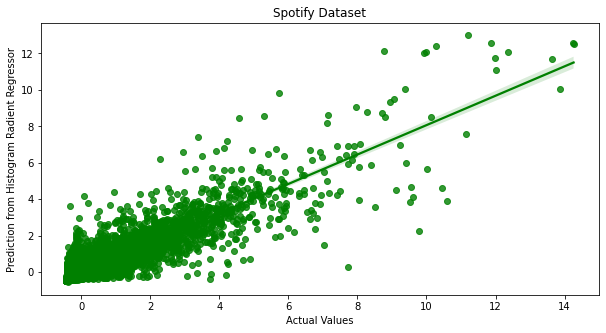

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Spotify Dataset")
sns.regplot(x=y_test,y=predictions,data=cleansedDataDf,color ='green');
plt.xlabel('Actual Values')
plt.ylabel('Prediction from Histogram Radient Regressor')
plt.show()

In [ ]:
#Evaluation techniques
from sklearn.metrics import mean_squared_error as mse
mse_value =  mse(y_test, predictions,squared=False)
print(f'The RMSE of prediction is: {mse_value}')
from sklearn.metrics import mean_squared_error as mean_squared_error
mse_test = mean_squared_error(y_test, predictions,squared=True)
print(f'The MSE of prediction is: {mse_test}')
#MAE(Mean absolute Error) #calculates between actual and predicted values 
from sklearn.metrics import mean_absolute_error as mae
mae_value=mae(y_test, predictions)
print(f'The MAE of prediction is: {mae_value}')
# MAPE(Mean Absolute Percentage Error) #This efficieny  is best to compare with others
mape=mae(y_test, predictions)*100
print(f'The MAPE of prediction is: {mape}')
#R squared value
#explains how well a model fits the dataset
# a value of 0 explains response variable cannot be explained by predictor varaible
from sklearn.metrics import r2_score
r_squarevalue=r2_score(y_test, predictions)
print(f'The R square of prediction is: {r_squarevalue}')


The RMSE of prediction is: 0.4204912886147952
The MSE of prediction is: 0.176812923800931
The MAE of prediction is: 0.1846211461202295
The MAPE of prediction is: 18.46211461202295
The R square of prediction is: 0.82945922560725


In [ ]:
#Extra Trees Regressor Model
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import ExtraTreesRegressor
reg_model = ExtraTreesRegressor()
reg_model.fit(X_train,y_train)

score = reg_model.score(X_train,y_train) #tells the performance of regressor model
print("Score: ", score)
cv_scores = cross_val_score(reg_model,X_train,y_train,cv=10) #cross validation isnt about building/ purning decision trees. It is about how good a tree will perform on simulating new data
                                                         #returns a list of one score per split, t
                                                        #cv is number of splits to use
print(cv_scores)
print("Mean cross-validataion score: %.2f" % cv_scores.mean())
y_pred=reg_model.predict(X_test)


<ipython-input-112-49fe55530202>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_model.fit(X_train,y_train)


Score:  0.9994407777694109


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[0.79194584 0.82174983 0.82030062 0.78434287 0.78473038 0.81212446
 0.82131045 0.79649126 0.78087757 0.81806189]
Mean cross-validataion score: 0.80


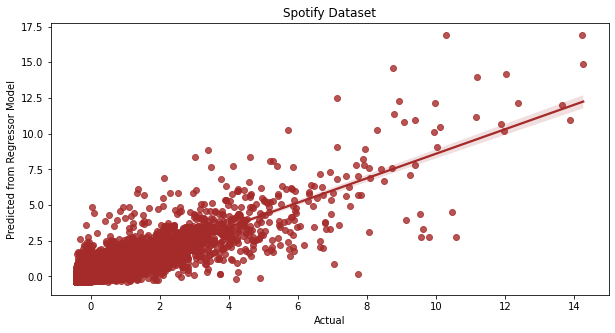

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Spotify Dataset")
sns.regplot(x=y_test,y=y_pred,data=cleansedDataDf,color ='brown')
plt.xlabel('Actual')
plt.ylabel('Predicted from Regressor Model')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error as mse_et
mse_et_reg =  mse_et(y_test, y_pred,squared=False)
print(f'The RMSE of prediction is: {mse_et_reg}')
from sklearn.metrics import mean_squared_error 
rmse_et_reg =  mean_squared_error(y_test, y_pred,squared=True)
print(f'The MSE of prediction is: {rmse_et_reg}')
#MAE(Mean absolute Error)
from sklearn.metrics import mean_absolute_error 
mae_et= mean_absolute_error (y_test, y_pred)
print(f'The MAE of prediction is: {mae_et}')
mape_et=mae(y_test, y_pred)*100
print(f'The MAPE of prediction is: {mape_et}')
from sklearn.metrics import r2_score
r_square_et=r2_score(y_test, y_pred)
print(f'The R square of prediction is: {r_square_et}')

The RMSE of prediction is: 0.45384218844404406
The MSE of prediction is: 0.2059727320116792
The MAE of prediction is: 0.17832862191172458
The MAPE of prediction is: 17.832862191172456
The R square of prediction is: 0.8013338139206927


In [ ]:
#voting regressor 
from sklearn.ensemble import VotingRegressor
regressor_histogram =  HistGradientBoostingRegressor()
regressor_extratrees = ExtraTreesRegressor()

votingreg = VotingRegressor([('Histogram Radient Regressor Model', regressor_histogram), ('Extra Trees model', regressor_extratrees)])
votingreg.fit(X_train,y_train)
test_pred_votingreg=votingreg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


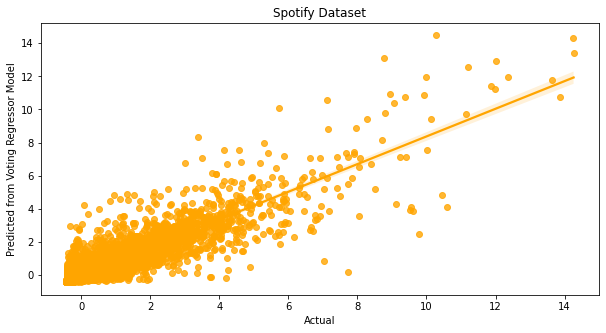

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Spotify Dataset")
sns.regplot(x=y_test,y=test_pred_votingreg,data=cleansedDataDf,color ='orange')
plt.xlabel('Actual')
plt.ylabel('Predicted from Voting Regressor Model')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error as mse
mse_value_votreg =  mse(y_test, test_pred_votingreg,squared=False)
print(f'The RMSE of prediction is: {mse_value_votreg}')

from sklearn.metrics import mean_squared_error as mean_squared_error
mse_value_votreg = mean_squared_error(y_test, test_pred_votingreg,squared=True)
print(f'The MSE of prediction is: {mse_value_votreg}')

from sklearn.metrics import mean_absolute_error 
mae_votreg= mean_absolute_error (y_test, y_pred)
print(f'The MAE of prediction is: {mae_votreg}')

mape_votreg=mae(y_test, y_pred)*100
print(f'The MAPE of prediction is: {mape_votreg}')

from sklearn.metrics import r2_score
r_square_votreg=r2_score(y_test, y_pred)
print(f'The R square of prediction is: {r_square_votreg}')

The RMSE of prediction is: 0.41725232809002716
The MSE of prediction is: 0.17409950529654766
The MAE of prediction is: 0.17832862191172458
The MAPE of prediction is: 17.832862191172456
The R square of prediction is: 0.8013338139206927


In [ ]:
# doing qcut 
a=np.unique(pd.qcut(cleansedDataDf['Popularity'], q=6))
a

array([Interval(-0.426, -0.422, closed='right'),
       Interval(-0.422, -0.414, closed='right'),
       Interval(-0.414, -0.383, closed='right'),
       Interval(-0.383, -0.26, closed='right'),
       Interval(-0.26, 0.261, closed='right'),
       Interval(0.261, 16.948, closed='right')], dtype=object)

In [ ]:
def func(a):
    # print(a)
    if a >= -0.426 and a <-0.422:
      return "A"
    elif a>= -0.422 and a<-0.414:
      return "B"
    elif a>= -0.414 and a<-0.383:
      return "C"
    elif a>= -0.383 and a<-0.26:
      return "D"
    elif a>= -0.26 and a<0.261:
      return "E"
    elif a>= 0.261 and a<16.95:
      return "F"
    else:
      return 'N/A'

In [ ]:
# test1=[]

# test1 = list(cleansedDataDf.columns)




In [ ]:
cleansedDataDf['number_bins'] = cleansedDataDf['Popularity'].apply(func)

In [ ]:
test=[]

test = list(cleansedDataDf.columns)
test.remove('number_bins')
test.remove ('Popularity')


In [ ]:
test

['Title',
 'Artist',
 'Artist_followers',
 'Explicit',
 'Album',
 'Release_date',
 'Track_number',
 'Tracks_in_album',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acoustics',
 'instrumentalness',
 'liveliness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature',
 'Days_since_release',
 'Released_after_2017',
 'compilation',
 'syuzhet_norm',
 'bing_norm',
 'afinn_norm',
 'nrc_norm',
 'anger_norm2',
 'anticipation_norm2',
 'disgust_norm2',
 'fear_norm2',
 'joy_norm2',
 'sadness_norm2',
 'surprise_norm2',
 'trust_norm2',
 'negative_norm2',
 'positive_norm2',
 'negative_bog_jr',
 'positive_bog_jr',
 'Bayes',
 'Negative_Bayes',
 'Neutral_Bayes',
 'Positive_Bayes',
 'bing_norm_negative',
 'bing_norm_neutral',
 'bing.1',
 'Popu_max',
 'Cluster',
 'Countries',
 'Song_Type',
 'Song_Purpose',
 'Song_composers']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(cleansedDataDf[test],cleansedDataDf['number_bins'],test_size=0.25,random_state=seed)

In [ ]:
X_train.dtypes

Title                  float64
Artist                 float64
Artist_followers       float64
Explicit               float64
Album                  float64
Release_date           float64
Track_number           float64
Tracks_in_album        float64
danceability           float64
energy                 float64
key                    float64
loudness               float64
mode                   float64
speechiness            float64
acoustics              float64
instrumentalness       float64
liveliness             float64
valence                float64
tempo                  float64
duration_ms            float64
time_signature         float64
Days_since_release     float64
Released_after_2017    float64
compilation            float64
syuzhet_norm           float64
bing_norm              float64
afinn_norm             float64
nrc_norm               float64
anger_norm2            float64
anticipation_norm2     float64
disgust_norm2          float64
fear_norm2             float64
joy_norm

In [ ]:
y_train.dtypes

dtype('O')

In [ ]:
#histogram boosting gradient classifer
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier
histogram_classifier = HistGradientBoostingClassifier()
histogram_classifier.fit(X_train,y_train)
y_pred_hisclass = histogram_classifier.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report
classificationReport=classification_report(y_test, y_pred_hisclass)
print(classificationReport)
# plot_classification_report(classificationReport)

              precision    recall  f1-score   support

           A       0.81      0.96      0.88      2841
           B       0.60      0.68      0.64      2931
           C       0.55      0.47      0.51      2906
           D       0.59      0.46      0.52      2913
           E       0.64      0.67      0.66      2941
           F       0.86      0.86      0.86      2937

    accuracy                           0.68     17469
   macro avg       0.68      0.68      0.68     17469
weighted avg       0.68      0.68      0.68     17469



[0.81, 0.96, 0.88]
[0.6, 0.68, 0.64]
[0.55, 0.47, 0.51]
[0.59, 0.46, 0.52]
[0.64, 0.67, 0.66]
[0.86, 0.86, 0.86]


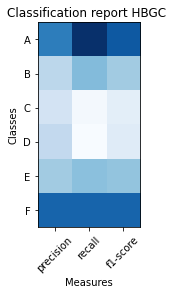

In [ ]:
def plot_classification_report(cr, title='Classification report HBGC ', with_avg_total=False, cmap=plt.cm.Blues):

    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        #print(line)
        t = line.split()
        # print(t)
        if (len(t)==0):
          break
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)

    plt.figure(figsize=(4,4))
    plt.imshow(plotMat,interpolation='nearest', cmap=cmap)
    plt.title(title)
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
   
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'],rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')
   
plot_classification_report(classificationReport)



In [ ]:
#Extra Trees Classifer

from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 100, #n_estimators is the number of trees in forest
          criterion ='entropy', max_features = "auto") #criterion is to measure the quality of split
# Training the model
extra_tree_forest.fit(X_train,y_train)
y_pred_extratrees = extra_tree_forest.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
classificationReport_et=classification_report(y_test, y_pred_extratrees )

print(classificationReport_et)

              precision    recall  f1-score   support

           A       0.79      0.83      0.81      2841
           B       0.55      0.58      0.57      2931
           C       0.53      0.50      0.51      2906
           D       0.58      0.56      0.57      2913
           E       0.66      0.67      0.66      2941
           F       0.87      0.84      0.86      2937

    accuracy                           0.66     17469
   macro avg       0.66      0.66      0.66     17469
weighted avg       0.66      0.66      0.66     17469



[0.79, 0.83, 0.81]
[0.55, 0.58, 0.57]
[0.53, 0.5, 0.51]
[0.58, 0.56, 0.57]
[0.66, 0.67, 0.66]
[0.87, 0.84, 0.86]


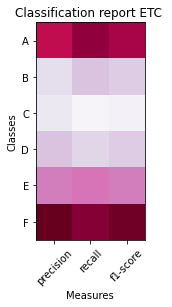

In [ ]:
def plot_classification_report(cr, title='Classification report ETC ', with_avg_total=False, cmap=plt.cm.PuRd):

    lines = cr.split('\n')
    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        #print(line)
        t = line.split()
        # print(t)
        if (len(t)==0):
          break
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)

    plt.figure(figsize=(4,4))
    plt.imshow(plotMat,interpolation='nearest', cmap=cmap)
    plt.title(title)
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
   
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    # plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')
plot_classification_report(classificationReport_et)



In [ ]:
#voting classifer

from sklearn.ensemble import VotingClassifier
clf1=HistGradientBoostingClassifier()
clf2=ExtraTreesClassifier()


res = VotingClassifier(estimators=[('HistogramGradientRegressor', clf1), ('ExtraTrees', clf2)],
                        voting='hard')
res=res.fit(X_train,y_train)
y_pred_votclas_soft=res.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report
classificationReport_ha=classification_report(y_test, y_pred_votclas_soft )
print(classificationReport_ha)

              precision    recall  f1-score   support

           A       0.75      0.97      0.85      2841
           B       0.54      0.67      0.60      2931
           C       0.51      0.47      0.49      2906
           D       0.59      0.48      0.53      2913
           E       0.70      0.63      0.66      2941
           F       0.94      0.79      0.86      2937

    accuracy                           0.67     17469
   macro avg       0.67      0.67      0.66     17469
weighted avg       0.67      0.67      0.66     17469



[0.75, 0.97, 0.85]
[0.54, 0.67, 0.6]
[0.51, 0.47, 0.49]
[0.59, 0.48, 0.53]
[0.7, 0.63, 0.66]
[0.94, 0.79, 0.86]


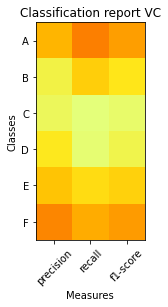

In [ ]:
def plot_classification_report(cr, title='Classification report VC', with_avg_total=False, cmap=plt.cm.Wistia):

    lines = cr.split('\n')
    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        #print(line)
        t = line.split()
        # print(t)
        if (len(t)==0):
          break
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)

    plt.figure(figsize=(4,4))
    plt.imshow(plotMat,interpolation='nearest', cmap=cmap)
    plt.title(title)
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
   
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    # plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')
plot_classification_report(classificationReport_ha)

In [ ]:
res2 = VotingClassifier(estimators=[('HistogramGradientRegressor', clf1), ('ExtraTrees', clf2)],
                        voting='soft')
res2=res2.fit(X_train,y_train)
y_pred_votclas_hard=res2.predict(X_test)


In [ ]:
# from sklearn.metrics import precision_score

# print("Precision score: {}".format(precision_score(y_true,y_pred_votclas_hard)))


In [ ]:
from sklearn.metrics import classification_report
classificationReport_so=classification_report(y_test, y_pred_votclas_hard)
print(classificationReport_so)

              precision    recall  f1-score   support

           A       0.83      0.93      0.88      2841
           B       0.63      0.67      0.65      2931
           C       0.59      0.53      0.56      2906
           D       0.61      0.57      0.59      2913
           E       0.68      0.70      0.69      2941
           F       0.88      0.87      0.88      2937

    accuracy                           0.71     17469
   macro avg       0.71      0.71      0.71     17469
weighted avg       0.70      0.71      0.71     17469



[0.83, 0.93, 0.88]
[0.63, 0.67, 0.65]
[0.59, 0.53, 0.56]
[0.61, 0.57, 0.59]
[0.68, 0.7, 0.69]
[0.88, 0.87, 0.88]


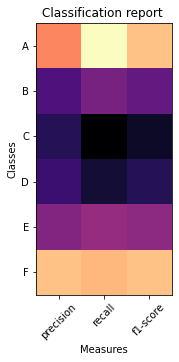

In [ ]:
def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.magma):

    lines = cr.split('\n')
    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        #print(line)
        t = line.split()
        # print(t)
        if (len(t)==0):
          break
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)

    plt.figure(figsize=(10,5))
    plt.imshow(plotMat,interpolation='nearest', cmap=cmap)
    plt.title(title)
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
   
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    # plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')
plot_classification_report(classificationReport_so)

In [ ]:
seed=1
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
new_df= pd.DataFrame(scale.fit_transform(new_df.values),columns=new_df.columns)

In [ ]:
new_df.dtypes

Popularity             float64
Title                  float64
Artist                 float64
Artist_followers       float64
Explicit               float64
Album                  float64
Release_date           float64
Track_number           float64
Tracks_in_album        float64
danceability           float64
energy                 float64
key                    float64
loudness               float64
mode                   float64
speechiness            float64
acoustics              float64
instrumentalness       float64
liveliness             float64
valence                float64
tempo                  float64
duration_ms            float64
time_signature         float64
Days_since_release     float64
Released_after_2017    float64
compilation            float64
syuzhet_norm           float64
bing_norm              float64
afinn_norm             float64
nrc_norm               float64
anger_norm2            float64
anticipation_norm2     float64
disgust_norm2          float64
fear_nor

In [ ]:
# cleansedDataDf.dtypes


In [ ]:
#  del cleansedDataDf['Popularity']

In [ ]:
#PCA
from sklearn.decomposition import PCA
pca_30=PCA(n_components=35, random_state=seed)
pca_30.fit(new_df)
X_pca_30=pca_30.transform(new_df)

In [ ]:
print("Variance explained by all 30 principal components=",sum(pca_30.explained_variance_ratio_*100)) #explained variance ratio

Variance explained by all 30 principal components= 90.23970771805196


In [ ]:
pca_30.explained_variance_ratio_*100 #explained_variance_ratio is the percentage of variance attributed by each of the selected columns 

array([13.83831136,  6.29506725,  5.32212576,  4.24953031,  3.99455803,
        3.26991775,  2.94717449,  2.6901907 ,  2.57444937,  2.42925665,
        2.33149045,  2.25480841,  2.22395847,  2.15208043,  2.0950368 ,
        1.99046005,  1.95763147,  1.90770443,  1.84821269,  1.83596106,
        1.78006524,  1.73257956,  1.72156529,  1.69409458,  1.67806935,
        1.56399506,  1.50912863,  1.46836375,  1.42507353,  1.35897406,
        1.33240225,  1.26688021,  1.21094188,  1.17377921,  1.11586921])

In [ ]:
np.cumsum(pca_30.explained_variance_ratio_ * 100)

array([13.83831136, 20.13337861, 25.45550437, 29.70503468, 33.69959271,
       36.96951045, 39.91668495, 42.60687565, 45.18132502, 47.61058168,
       49.94207212, 52.19688053, 54.420839  , 56.57291942, 58.66795622,
       60.65841628, 62.61604775, 64.52375218, 66.37196487, 68.20792592,
       69.98799116, 71.72057072, 73.44213601, 75.13623059, 76.81429994,
       78.378295  , 79.88742363, 81.35578738, 82.78086091, 84.13983497,
       85.47223721, 86.73911742, 87.9500593 , 89.12383851, 90.23970772])

Text(0, 0.5, 'Explained Variance')

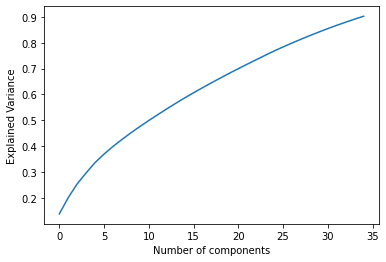

In [ ]:
plt.plot(np.cumsum(pca_30.explained_variance_ratio_ ))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')

In [ ]:
print("Variance explained by first PCA=",np.cumsum(pca_30.explained_variance_ratio_*100)[0])

Variance explained by first PCA= 13.838311355049203


In [ ]:
print("Variance explained by first PCA=",np.cumsum(pca_30.explained_variance_ratio_*100)[2])

Variance explained by first PCA= 25.45550437169456


In [ ]:
print("Variance explained by first PCA=",np.cumsum(pca_30.explained_variance_ratio_*100)[3])

Variance explained by first PCA= 29.70503467876289


In [ ]:
print("Variance explained by first PCA=",np.cumsum(pca_30.explained_variance_ratio_*100)[34])

Variance explained by first PCA= 90.23970771805196


In [ ]:
# pca_30=PCA(n_components=0.92, random_state=seed)
# pca_30.fit(cleansedDataDf)
# X_pca_30=pca_30.transform(cleansedDataDf)

In [ ]:
X_pca_30.shape

(69875, 35)

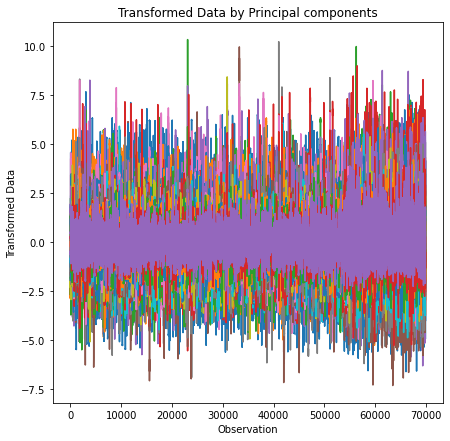

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(X_pca_30)
plt.xlabel('Observation')
plt.ylabel('Transformed Data')
plt.title("Transformed Data by Principal components")
plt.show()

In [ ]:
df_new_data=pd.DataFrame(X_pca_30,columns=['PCA1','PCA1','PCA1','PCA1','PCA1','PCA1','PCA1','PCA1','PCA1','PCA1','PCA1','PCA1','PCA1','PCA1','PCA1','PCA1','PCA1','PCA1','PCA1',
                                           'PCA1','PCA1','PCA1','PCA1','PCA1','PCA1','PCA1','PCA1','PCA1','PCA1','PCA1','PCA1','PCA1','PCA1','PCA1','PCA1'])


In [ ]:
df_new_data

,PCA1,PCA1,PCA1,PCA1,PCA1,PCA1,PCA1,PCA1,PCA1,PCA1,...,PCA1,PCA1,PCA1,PCA1,PCA1,PCA1,PCA1,PCA1,PCA1,PCA1
0,-2.401628,-2.806612,0.672659,0.464294,0.430170,-0.140541,0.825157,1.614984,1.388953,-0.800159,...,-0.720499,-0.948470,-1.129702,0.058127,-1.012281,1.090633,-0.084636,1.288907,0.259051,-0.561649
1,-2.415804,-2.744928,0.685959,0.437749,0.297311,-0.175200,0.770316,1.517929,1.505292,-0.838205,...,-0.724781,-0.996926,-1.043843,-0.007113,-1.067927,1.148058,-0.218948,1.317526,0.287535,-0.637219
2,-2.414361,-2.774054,0.744965,0.496836,0.428444,-0.522171,0.395202,1.603707,1.562721,-0.899289,...,-0.790758,-0.995473,-0.981926,0.057708,-1.034585,1.159315,-0.210365,1.336596,0.248591,-0.656216
3,-2.412444,-2.776425,0.673940,0.442598,0.375991,-0.099602,0.890938,1.587153,1.400751,-0.802511,...,-1.533504,-0.860054,-0.644047,-0.029241,-1.062486,1.271776,-0.230138,1.275736,0.237842,-0.559739
4,-2.409292,-2.833847,0.791605,0.561815,0.636786,-0.796748,0.137357,1.754865,1.518974,-0.924560,...,-1.632568,-0.862531,-0.539910,0.107303,-0.990133,1.286509,-0.208238,1.315011,0.158593,-0.600359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69870,-4.038714,0.923974,1.910760,2.268034,2.681143,1.466685,-0.254153,-0.688812,-1.120435,-0.815249,...,0.081000,0.499037,-0.810388,-0.268357,-0.221411,0.050480,-0.505253,-0.226719,-1.048572,-0.375315
69871,4.169998,-1.209042,-1.938542,-0.539766,-1.558106,-0.719218,-0.162932,-1.058209,-0.431681,-1.201283,...,-0.191779,0.795425,0.242662,-0.243279,-0.274165,-0.187225,0.254536,-0.543700,-0.392523,-0.096895
69872,0.336975,-0.219141,-0.304895,-2.683044,1.046778,-1.249029,-1.177945,0.738874,-0.025862,-1.709596,...,-0.606103,0.530411,-1.025415,0.148951,1.622893,1.212959,-1.190801,0.071997,-0.532296,0.633772
69873,-0.245407,0.913988,0.323388,1.556760,0.966564,-1.277875,0.399116,1.748401,2.282071,-0.391068,...,1.195115,-1.082111,0.836439,0.139125,0.054987,0.553649,-1.914315,-0.816261,0.271518,0.699516


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df_new_data,cleansedDataDf['Popularity'],test_size=0.25,random_state=seed)

In [ ]:
#Histogram Radient Regressor 
kf = KFold(n_splits=10, random_state=seed, shuffle=True)
X = X_train.reset_index().drop(['index'],axis=1)#.to_numpy() #X_train you have given
X_test= X_test.reset_index().drop(['index'],axis=1)#.to_numpy() #X_test you have given
y=pd.DataFrame((y_train).to_numpy().squeeze(), columns=['Popularity'])#pd.DataFrame((y_train).to_numpy().squeeze())
predictions_array_value = []
CV_score_array_value   = []

for train_index, test_index in kf.split(X): #train_indes and test_index are tow variable going through 
  train_index = list(train_index)
  test_index = list(test_index)
  X_train, X_valid = X.loc[train_index,:], X.loc[test_index,:]
  y_train, y_valid = y.loc[train_index,:], y.loc[test_index,:]
    
  regressor_apca=  HistGradientBoostingRegressor()
  regressor_apca.fit(X_train, y_train)
    
  predictions_array.append(regressor_apca.predict(X_test))
  CV_score_array.append(mean_absolute_error(y_valid,regressor_apca.predict(X_valid)))    

predictions_a = np.mean(predictions_array,axis=0)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
from sklearn.metrics import mean_squared_error as mse
mse_value_a =  mse(y_test,predictions_a,squared=False)
print(f'The RMSE of prediction is: {mse_value_a}')

from sklearn.metrics import mean_squared_error as mean_squared_error
mse_value_a = mean_squared_error(y_test,predictions_a,squared=True)
print(f'The MSE of prediction is: {mse_value_a}')

from sklearn.metrics import mean_absolute_error 
mae_a= mean_absolute_error (y_test,predictions_a)
print(f'The MAE of prediction is: {mae_a}')

mape_a=mae(y_test, predictions_a)*100
print(f'The MAPE of prediction is: {mape_votreg}')

from sklearn.metrics import r2_score
r_square_a=r2_score(y_test, predictions_a)
print(f'The R square of prediction is: {r_square_a}')

The RMSE of prediction is: 0.25885057146966794
The MSE of prediction is: 0.06700361835017368
The MAE of prediction is: 0.13304188990261764
The MAPE of prediction is: 17.832862191172456
The R square of prediction is: 0.9353732254695359


In [ ]:
#Evaluation techniques
from sklearn.metrics import mean_squared_error as mse
mse_value =  mse(y_test, predictions_a,squared=False)
print(f'The RMSE of prediction is: {mse_value}')


The RMSE of prediction is: 0.25885057146966794


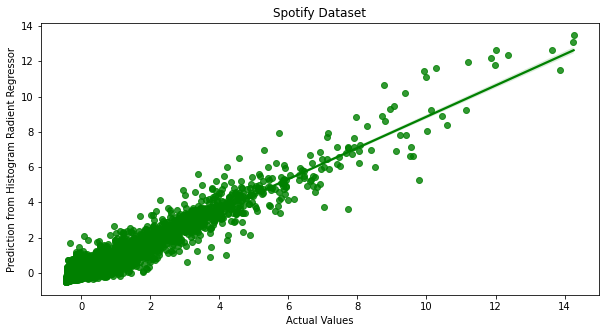

In [ ]:
plt.figure(figsize=(10,5))
# plt.scatter(y_test,predictions,color="blue")
# plt.plot(x_ax, predictions, lw=0.8, color="yellow", label="predicted")
plt.title("Spotify Dataset")
sns.regplot(x=y_test,y=predictions_a,data=df_new_data,color ='green');
plt.xlabel('Actual Values')
plt.ylabel('Prediction from Histogram Radient Regressor')
plt.show()

In [ ]:
#Extra Trees Regressor Model
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
reg_model_apca = ExtraTreesRegressor()
reg_model_apca.fit(X_train,y_train)

score_a = reg_model_apca.score(X_train,y_train) #tells the performance of regressor model
print("Score: ", score_a)

<ipython-input-164-0532dbd18d6f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_model_apca.fit(X_train,y_train)


Score:  1.0


In [ ]:
cv_scores_pca = cross_val_score(reg_model_apca,X_train,y_train,cv=10) #cross validation isnt about building/ purning decision trees. It is about how good a tree will perform on simulating new data
                                                         #returns a list of one score per split, t
                                                        #cv is number of splits to use
print("Mean cross-validataion score: %.2f" % cv_scores_pca.mean())

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Mean cross-validataion score: 0.97


In [ ]:
y_pred_a=reg_model_apca.predict(X_test)

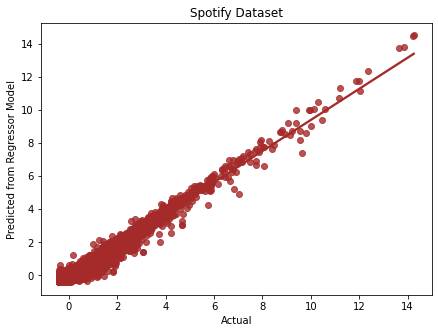

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Spotify Dataset")
sns.regplot(x=y_test,y=y_pred_a,data=df_new_data,color ='brown')
plt.xlabel('Actual')
plt.ylabel('Predicted from Regressor Model')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error as mse
mse_value_b =  mse(y_test,y_pred_a,squared=False)
print(f'The RMSE of prediction is: {mse_value_b}')

from sklearn.metrics import mean_squared_error as mean_squared_error
mse_value_b = mean_squared_error(y_test,y_pred_a,squared=True)
print(f'The MSE of prediction is: {mse_value_b}')

from sklearn.metrics import mean_absolute_error 
mae_b= mean_absolute_error (y_test,y_pred_a)
print(f'The MAE of prediction is: {mae_b}')

mape_b=mae(y_test, y_pred_a)*100
print(f'The MAPE of prediction is: {mape_votreg}')

from sklearn.metrics import r2_score
r_square_b=r2_score(y_test, y_pred_a)
print(f'The R square of prediction is: {r_square_b}')

The RMSE of prediction is: 0.15284736916850977
The MSE of prediction is: 0.02336231826173471
The MAE of prediction is: 0.07909527936123639
The MAPE of prediction is: 17.832862191172456
The R square of prediction is: 0.9774664217845758


In [ ]:
from sklearn.metrics import mean_squared_error as mse_et
mse_et_reg =  mse_et(y_test, y_pred_a,squared=False)
print(f'The RMSE of prediction is: {mse_et_reg}')

The RMSE of prediction is: 0.15284736916850977


In [ ]:
from sklearn.ensemble import VotingRegressor
regressor_histogram_a =  HistGradientBoostingRegressor()
regressor_extratrees_a = ExtraTreesRegressor()

votingreg_a = VotingRegressor([('Histogram Radient Regressor Model', regressor_histogram_a), ('Extra Trees model',regressor_extratrees_a )])
votingreg_a.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingRegressor(estimators=[('Histogram Radient Regressor Model',
                             HistGradientBoostingRegressor()),
                            ('Extra Trees model', ExtraTreesRegressor())])

In [ ]:
test_pred_votingreg_pca=votingreg_a.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error as mse
mse_value_votreg_pca =  mse(y_test, test_pred_votingreg_pca,squared=False)
print(f'The RMSE of prediction is: {mse_value_votreg_pca}')

from sklearn.metrics import mean_squared_error as mean_squared_error
mse_value_votreg_pca = mean_squared_error(y_test, test_pred_votingreg_pca,squared=True)
print(f'The MSE of prediction is: {mse_value_votreg_pca}')

from sklearn.metrics import mean_absolute_error 
mae_votreg_pca= mean_absolute_error (y_test, test_pred_votingreg_pca)
print(f'The MAE of prediction is: {mae_votreg_pca}')

mape_votreg_pca=mae(y_test, y_pred)*100
print(f'The MAPE of prediction is: {mape_votreg_pca}')

from sklearn.metrics import r2_score
r_square_votreg_pca=r2_score(y_test, test_pred_votingreg_pca)
print(f'The R square of prediction is: {r_square_votreg_pca}')

The RMSE of prediction is: 0.1567559740032717
The MSE of prediction is: 0.024572435385714398
The MAE of prediction is: 0.08895271659585408
The MAPE of prediction is: 17.832862191172456
The R square of prediction is: 0.9762992315872021


In [ ]:
#True Positive(the highlighted diagonals above )
# TP = np.diag(cm)
# TP

In [ ]:
# #True negative
# TN = cm.sum() - (FP + FN + TP)
# TN